In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.
print(X.shape)

# rescale the data, use the traditional train/test split
import math
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
print(X_train.shape, X_test.shape)

Automatically created module for IPython interactive environment
(70000, 784)
(52500, 784) (17500, 784)


In [9]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(25,25), max_iter=100, alpha=1e-3,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

mlp.fit(X_train, y_train)

Iteration 1, loss = 1.98416211
Iteration 2, loss = 1.15799573
Iteration 3, loss = 0.71729804
Iteration 4, loss = 0.55109550
Iteration 5, loss = 0.47023046
Iteration 6, loss = 0.42244204
Iteration 7, loss = 0.39109148
Iteration 8, loss = 0.36896040
Iteration 9, loss = 0.35212560
Iteration 10, loss = 0.33864044
Iteration 11, loss = 0.32764864
Iteration 12, loss = 0.31814226
Iteration 13, loss = 0.30989576
Iteration 14, loss = 0.30301153
Iteration 15, loss = 0.29635679
Iteration 16, loss = 0.29050251
Iteration 17, loss = 0.28482703
Iteration 18, loss = 0.27985794
Iteration 19, loss = 0.27496855
Iteration 20, loss = 0.27043908
Iteration 21, loss = 0.26603664
Iteration 22, loss = 0.26180564
Iteration 23, loss = 0.25786880
Iteration 24, loss = 0.25400091
Iteration 25, loss = 0.25012369
Iteration 26, loss = 0.24643451
Iteration 27, loss = 0.24273436
Iteration 28, loss = 0.23945108
Iteration 29, loss = 0.23607355
Iteration 30, loss = 0.23296191
Iteration 31, loss = 0.22984705
Iteration 32, los

C:\Users\Dharma\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(25, 25), max_iter=100,
              random_state=1, solver='sgd', verbose=10)

In [3]:
print("Training set score: {}", mlp.score(X_train, y_train))
print("Test set score: {}", mlp.score(X_test, y_test))

Training set score: {} 0.9777523809523809
Test set score: {} 0.9645142857142858


In [4]:
print("Number of layers =" , mlp.n_layers_)
print("layerweigts =" , len(mlp.coefs_))
print("Number of outputs =" , mlp.n_outputs_)
print("classes =" , mlp.classes_)

print("First layer wieights shape:", mlp.coefs_ [0].shape)
print("First layer wieights:", mlp.coefs_ [0])
print("First layer wieights min and max:", mlp.coefs_ [0].min(), mlp.coefs_[0].max())

Number of layers = 4
layerweigts = 3
Number of outputs = 10
classes = ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
First layer wieights shape: (784, 100)
First layer wieights: [[-0.0136543   0.03625511 -0.08225779 ...  0.0121242  -0.08180429
   0.01927657]
 [-0.02852614  0.0044525   0.06350802 ... -0.04371158  0.01921626
   0.07388709]
 [ 0.07407793  0.00932247  0.06838937 ... -0.06917389  0.07944912
  -0.05239163]
 ...
 [-0.01413281 -0.03464957 -0.01390257 ... -0.02950874  0.01962537
   0.00615451]
 [-0.07145294  0.03860495  0.03857514 ... -0.06796319 -0.0038522
   0.01194411]
 [ 0.02288379  0.01874492  0.07311028 ...  0.05496374 -0.04810372
   0.02456357]]
First layer wieights min and max: -0.22537003149288592 0.25856177200355873


In [5]:
print("Second layer wieights shape:", mlp.coefs_ [1].shape, mlp.coefs_ [1].T.shape)
print("Second layer wieights:", mlp.coefs_ [1])
print("Second layer wieights min and max:", mlp.coefs_ [1].min(), mlp.coefs_[1].max())

Second layer wieights shape: (100, 50) (50, 100)
Second layer wieights: [[ 0.08635263 -0.0009579  -0.12599209 ...  0.298523   -0.25247218
  -0.13786898]
 [ 0.08775663  0.03014159 -0.07081473 ...  0.19493965  0.13165197
  -0.16040614]
 [-0.09423104 -0.24514241  0.20551454 ...  0.0791313   0.00472238
  -0.09943982]
 ...
 [ 0.01939542  0.24056971  0.16093357 ... -0.02946216  0.16073649
   0.23316733]
 [-0.17973043 -0.01174238 -0.05484742 ...  0.0227606   0.04035581
  -0.09602284]
 [-0.13124066  0.11354149  0.2530389  ...  0.19302723 -0.05169141
   0.10349469]]
Second layer wieights min and max: -0.3947780067343224 0.4604156089199448


In [6]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity

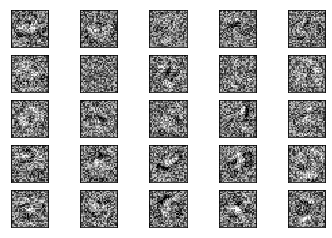

In [7]:
#Weights visualization - 1st layer
fig, axes = plt.subplots(5, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax =mlp.coefs_ [0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    #print("coef shape and axis index", coef.shape, ax)
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [8]:
# Excercise:
#improve accuracy >99 using solver=adam, early_stopping, max_iter
#try and notedown accuracies for solver lbgfs, activation = logistic/tanh, L2 regularization
#try and notedown accuracies for 3 or 4 hidden layers
#Compare results with LR & SVM